There are in general 5 types of cross validations:

1.k-fold cross-validation

2.Stratified k-fold cross-validation

3.Hold-out based validation

4.Leave-one-out cross-validation

5.Group k-fold cross validation

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut,GroupKFold,StratifiedShuffleSplit,train_test_split

## 1.KFold

In [46]:
data =  sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'Total counts')

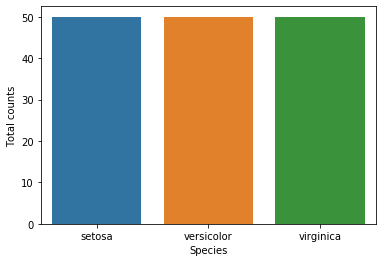

In [8]:
b = sns.countplot(x='species', data = data)
b.set_xlabel('Species')
b.set_ylabel('Total counts')

In [9]:
data['kfold'] = -1
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,kfold
0,5.1,3.5,1.4,0.2,setosa,-1
1,4.9,3.0,1.4,0.2,setosa,-1
2,4.7,3.2,1.3,0.2,setosa,-1
3,4.6,3.1,1.5,0.2,setosa,-1
4,5.0,3.6,1.4,0.2,setosa,-1


In [15]:
df = data.sample(frac =1,random_state=42).reset_index(drop=True) #reset index used to reset the index in serial order
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,kfold
0,6.1,2.8,4.7,1.2,versicolor,-1
1,5.7,3.8,1.7,0.3,setosa,-1
2,7.7,2.6,6.9,2.3,virginica,-1
3,6.0,2.9,4.5,1.5,versicolor,-1
4,6.8,2.8,4.8,1.4,versicolor,-1


In [16]:
kf = KFold(n_splits=5)
for fold, (t_,v_) in enumerate(kf.split(X=df)):
    print(fold,t_,v_)

0 [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
1 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 1

In [71]:
for fold, (t_,v_) in enumerate(kf.split(X=df)):
    df.loc[v_,'kfold'] = fold
df

,sepal_length,sepal_width,petal_length,petal_width,species,kfold
0,6.1,2.8,4.7,1.2,versicolor,0
1,5.7,3.8,1.7,0.3,setosa,0
2,7.7,2.6,6.9,2.3,virginica,0
3,6.0,2.9,4.5,1.5,versicolor,0
4,6.8,2.8,4.8,1.4,versicolor,0
...,...,...,...,...,...,...
145,6.1,2.8,4.0,1.3,versicolor,4
146,4.9,2.5,4.5,1.7,virginica,4
147,5.8,4.0,1.2,0.2,setosa,4
148,5.8,2.6,4.0,1.2,versicolor,4


(150, 6)

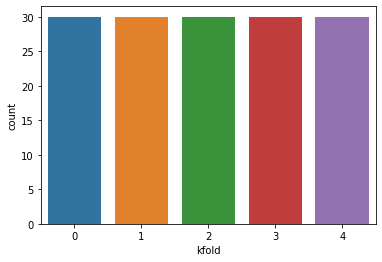

In [72]:
sns.countplot(x='kfold',data=df)
df.shape

Text(0.5, 0.98, 'Counts of different species in each of the folds(Kfold Cross Validation)')

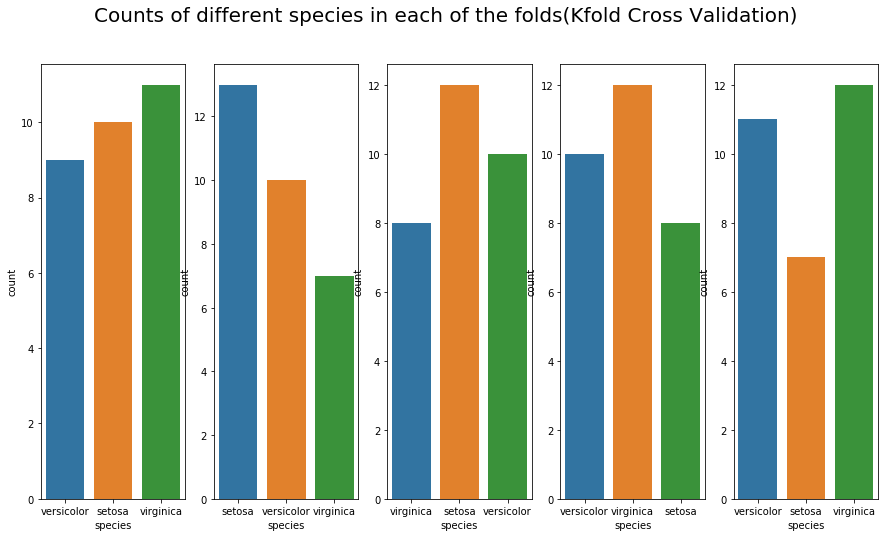

In [73]:
fig,ax = plt.subplots(1,5,figsize=(15, 8))
for i in range(5):
    sns.countplot(ax= ax[i],x='species',data = df[df['kfold']==i])
fig.suptitle('Counts of different species in each of the folds(Kfold Cross Validation)', fontsize = 20)

So from above plots we can see the kfold splits the whole datasets into 5 equal folds each containing 30 samples. The number of unique species per sample varies across the samples

## 2.StratifiedKFold

In [52]:
df = data.sample(frac =1,random_state=42).reset_index(drop=True)
strat_kf = StratifiedKFold(n_splits=5)
for fold, (t_,v_) in enumerate(strat_kf.split(X=df, y = df.species.values)):
    df.loc[v_,'kfold'] = fold

(150, 6)

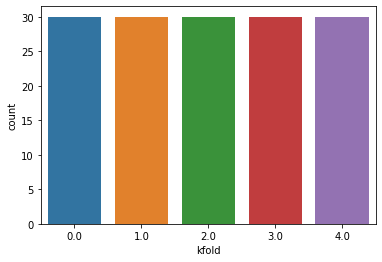

In [53]:
sns.countplot(x='kfold',data=df)
df.shape

training size : (120, 6)
validation size : (30, 6)


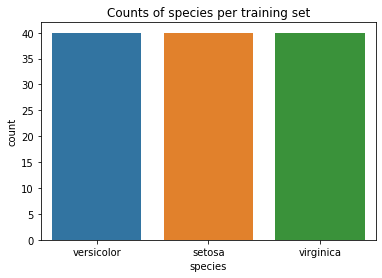

In [54]:
plot = sns.countplot(x='species',data=df.loc[t_]) #training set
plot.set_title('Counts of species per training set')
print("training size :", df.loc[t_].shape)
print("validation size :", df.loc[v_].shape)

Text(0.5, 0.98, 'Counts of different species in each of the folds(StartifiedKFold)')

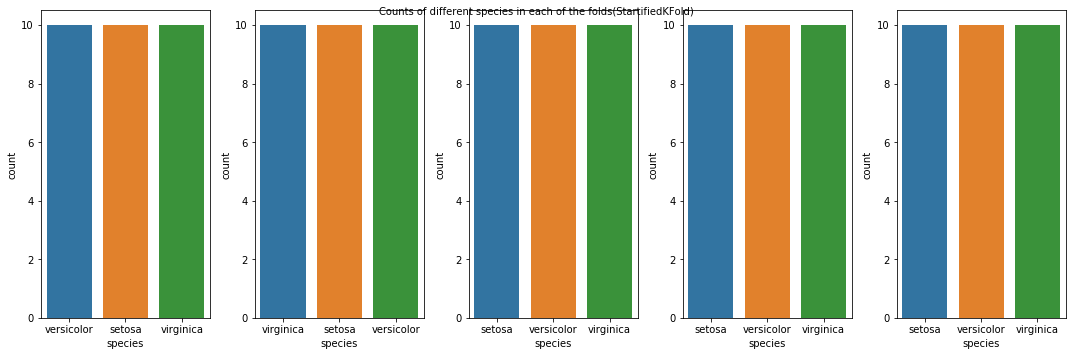

In [55]:
fig,ax = plt.subplots(1,5,figsize=(15, 5))
for i in range(5):
    sns.countplot(ax= ax[i],x='species',data = df[df['kfold']==i])
fig.tight_layout()
fig.suptitle('Counts of different species in each of the folds(StartifiedKFold)', fontsize = 10)

So, from the above plots we can see that, when we use StartifiedKfold instead of simple Kfold,both the training set and validation sets containsequal number of samples belonging to ach of the categories of IRIS flower. This is the advantage of StartifiedKfold over Kfold cross validation, that it maintains the ratio of different labels across both the training and validation sets .

>So if it's a standard classification problem, we may blindly choose StartifiedKFold over KFold

## 4.LeaveOneOut

In [58]:
df = data.sample(frac=1, random_state = 42).reset_index(drop=True)
df['kfold'] = -1
loo = LeaveOneOut()
for fold,(training,validation) in enumerate(loo.split(X = df)):
    df.loc[validation,'kfold'] = fold

In [61]:
df['kfold'].value_counts()

149    1
55     1
53     1
52     1
51     1
      ..
99     1
98     1
97     1
96     1
0      1
Name: kfold, Length: 150, dtype: int64

So, we can see in LeaveOneOut type of Cross Validation each sample is used as a validation set and rests are used as training set(k=N, where N is the no.of samples in the dataset). This type of validation can be costly in terms of computation efforts(if the model isn't fast enough) and can be used when we have very less training data available. 

## 5.ShuffleSplit Vs train_test_split

[reference](https://stackoverflow.com/a/46181361/14202432")

In [91]:
df = data.sample(frac=1, random_state = 42).reset_index(drop = True)
df['kfold'] = -1
shuf = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)
for fold,(t_,v_) in enumerate(shuf.split(X = df, y= df.species)):
    df.loc[v_,'kfold'] = fold

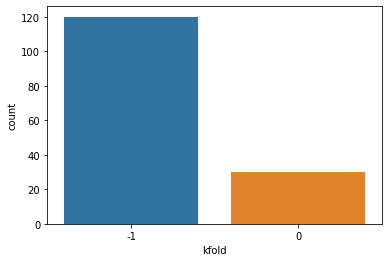

In [92]:
sns.countplot(x = 'kfold', data = df)

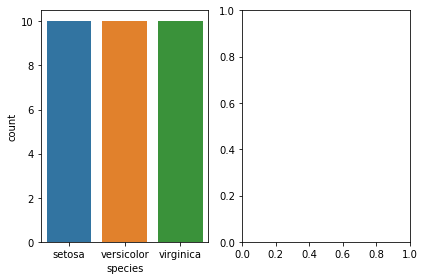

In [93]:
fig,ax = plt.subplots(1,2)
for i in range(1):
    sns.countplot(ax=ax[i], x='species', data = df[df['kfold']==i])
plt.tight_layout()

In [81]:
test_df = data.copy()
X = test_df.iloc[:,-1]
y = test_df.iloc[:,-1]

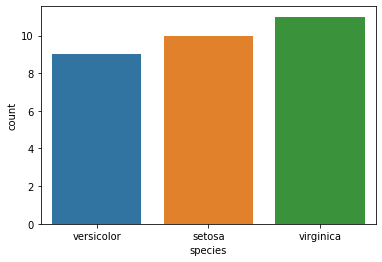

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)
sns.countplot(x = y_test)